In [ ]:
# Importation des bibliothèques nécessaires
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Chargement des données sur les émissions de CO2 des véhicules
data = pd.read_csv('/content/sample_data/CO2 Emissions_Canada.csv')
# Affichage des premières lignes du DataFrame
print(data.head())


    Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                   

In [ ]:
# Trouver les valeurs manquantes
print(data.isnull().sum())

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64


In [ ]:

# Convertir les colonnes catégorielles en numériques si nécessaire (par exemple, en utilisant l'encodage one-hot)
categorical_columns = data.select_dtypes(include=['object']).columns
print(f"Categorical columns: {categorical_columns}")

#Encoder les colonnes catégorielles en utilisant l'encodage one-hot
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

#Caractéristiques et variable cible
X = data.drop('CO2 Emissions(g/km)', axis=1)  # Replace with the actual target variable column name
y = data['CO2 Emissions(g/km)']


Categorical columns: Index([], dtype='object')


In [ ]:
# Caractéristiques et variable cible
X = data.drop('CO2 Emissions(g/km)', axis=1)
y = data['CO2 Emissions(g/km)']

X

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,Make_BENTLEY,...,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,2.0,4,9.9,6.7,8.5,33,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2.4,4,11.2,7.7,9.6,29,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,1.5,4,6.0,5.8,5.9,48,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
3,3.5,6,12.7,9.1,11.1,25,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3.5,6,12.1,8.7,10.6,27,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7316,2.0,4,10.7,7.7,9.4,30,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7317,2.0,4,11.2,8.3,9.9,29,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7318,2.0,4,11.7,8.6,10.3,27,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7319,2.0,4,11.2,8.3,9.9,29,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
# Diviser data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

# Initialiser le modèle
model = LinearRegression()

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)


LinearRegression()

In [ ]:

# Prédire sur le jeu de tes
y_pred = model.predict(X_test)

# Calculer les métriques
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 1.1512968394997567e+21
R-squared: -3.4164169013855635e+17


In [ ]:
data.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,...,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,2.0,4,9.9,6.7,8.5,33,196,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2.4,4,11.2,7.7,9.6,29,221,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,1.5,4,6.0,5.8,5.9,48,136,False,False,False,...,False,True,False,False,False,False,False,False,False,True
3,3.5,6,12.7,9.1,11.1,25,255,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3.5,6,12.1,8.7,10.6,27,244,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
# Préparer de nouvelles données pour la prédiction
# Créer un nouvel échantillon de données pour la prédiction
new_data = {
    'Engine Size': [3.5],
    'Cylinders': [6],
    'Fuel Consumption': [9.9],
    'Make_Toyota': [1],  # Exemple de variable catégorielle encodée one-hot
    'Fuel Type_Diesel': [0],  # Exemple de variable catégorielle encodée one-hot
    'Fuel Type_Premium': [1],  # Exemple de variable catégorielle encodée one-hot
    'Fuel Type_Regular': [0],  # Exemple de variable catégorielle encodée one-hot
    # Ajoutez d'autres caractéristiques ici si nécessaire, toutes doivent être présentes comme dans les colonnes de X_train
}

In [ ]:
# Creer une DataFrame depuis new data
new_data_df = pd.DataFrame(new_data)

# Ajouter des colonnes manquantes avec des valeurs par défaut de 0 dans le nouvel échantillon de données
for col in X_train.columns:
    if col not in new_data_df:
        new_data_df[col] = 0  # Ajouter des colonnes manquantes avec des valeurs par défaut de 0


# Réorganiser les colonnes des nouvelles données pour qu'elles correspondent aux colonnes des données d'entraînement
new_data_df = new_data_df[X_train.columns]


<ipython-input-12-53212e03f715>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_data_df[col] = 0  # Ajouter des colonnes manquantes avec des valeurs par défaut de 0
<ipython-input-12-53212e03f715>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_data_df[col] = 0  # Ajouter des colonnes manquantes avec des valeurs par défaut de 0
<ipython-input-12-53212e03f715>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

In [ ]:
# Prédire les émissions de CO2 pour la nouvelle data
new_pred = model.predict(new_data_df)
print(f'Predicted CO2 Emissions: {new_pred}')

Predicted CO2 Emissions: [3.49817924e+11]


In [ ]:
from sklearn.metrics import mean_squared_error

mse_lr = mean_squared_error(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred)

print(f'Régression Linéaire MSE: {mse_lr}')
print(f'Forêt Aléatoire MSE: {mse_rf}')

Régression Linéaire MSE: 1.1512968394997567e+21
Forêt Aléatoire MSE: 1.1512968394997567e+21


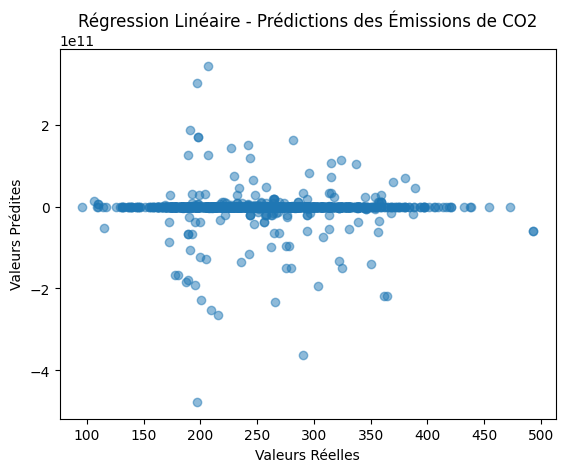

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')
plt.title('Régression Linéaire - Prédictions des Émissions de CO2')
plt.show()